In [303]:
!pip install pandas numpy matplotlib tensorflow scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [100]:
df=pd.read_excel("C:/Users/manor/OneDrive/Desktop/Group 15_BRM.xlsx")
df

,DATE,Transaction VALUE (IN CR.),Transaction VOL (IN M.),Reported UPI Fraud Cases,Fraud Transaction Value (₹ Crore),Avg Daily Spending per User (₹),Daily Change in Consumer Savings (%)
0,2021-05-01,18140.21,86.24,1084,1.09,76.42,-0.0068
1,2021-05-02,13692.47,79.37,1058,1.56,159.48,-0.0068
2,2021-05-03,20191.07,87.72,1132,0.54,71.63,-0.0068
3,2021-05-04,20005.02,89.31,1077,-0.10,121.71,-0.0068
4,2021-05-05,19438.15,87.70,1106,0.31,110.46,-0.0068
...,...,...,...,...,...,...,...
1395,2025-02-24,75820.65,563.48,10629,7.81,222.13,-0.0233
1396,2025-02-25,76593.92,576.50,10581,7.41,203.67,-0.0233
1397,2025-02-26,62994.82,552.08,10666,8.36,207.58,-0.0233
1398,2025-02-27,75714.97,555.48,10661,8.77,160.71,-0.0233


In [102]:
print(df.columns)

Index(['DATE', 'Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)',
       'Reported UPI Fraud Cases', 'Fraud Transaction Value (₹ Crore)',
       'Avg Daily Spending per User (₹)',
       'Daily Change in Consumer Savings (%)'],
      dtype='object')


In [104]:
print(df.dtypes)

DATE                                    datetime64[ns]
Transaction VALUE (IN CR.)                     float64
Transaction VOL (IN M.)                        float64
Reported UPI Fraud Cases                         int64
Fraud Transaction Value (₹ Crore)              float64
Avg Daily Spending per User (₹)                float64
Daily Change in Consumer Savings (%)           float64
dtype: object


In [106]:
print(df.isnull().sum())

DATE                                    0
Transaction VALUE (IN CR.)              0
Transaction VOL (IN M.)                 0
Reported UPI Fraud Cases                0
Fraud Transaction Value (₹ Crore)       0
Avg Daily Spending per User (₹)         0
Daily Change in Consumer Savings (%)    0
dtype: int64


In [108]:
df['Transaction VALUE (IN CR.)'] = pd.to_numeric(df['Transaction VALUE (IN CR.)'], errors='coerce')
df['Transaction VALUE (IN CR.)']


0       18140.21
1       13692.47
2       20191.07
3       20005.02
4       19438.15
          ...   
1395    75820.65
1396    76593.92
1397    62994.82
1398    75714.97
1399    97508.29
Name: Transaction VALUE (IN CR.), Length: 1400, dtype: float64

In [110]:
df['Transaction VOL (IN M.)'] = pd.to_numeric(df['Transaction VOL (IN M.)'], errors='coerce')
df['Transaction VOL (IN M.)'] 

0        86.24
1        79.37
2        87.72
3        89.31
4        87.70
         ...  
1395    563.48
1396    576.50
1397    552.08
1398    555.48
1399    600.66
Name: Transaction VOL (IN M.), Length: 1400, dtype: float64

In [112]:
df['Avg Daily Spending per User (₹)'] = pd.to_numeric(df['Avg Daily Spending per User (₹)'], errors='coerce')
df['Avg Daily Spending per User (₹)']

0        76.42
1       159.48
2        71.63
3       121.71
4       110.46
         ...  
1395    222.13
1396    203.67
1397    207.58
1398    160.71
1399    265.06
Name: Avg Daily Spending per User (₹), Length: 1400, dtype: float64

In [114]:
df['Fraud Transaction Value (₹ Crore)'] = pd.to_numeric(df['Fraud Transaction Value (₹ Crore)'], errors='coerce')
df['Fraud Transaction Value (₹ Crore)']

0       1.09
1       1.56
2       0.54
3      -0.10
4       0.31
        ... 
1395    7.81
1396    7.41
1397    8.36
1398    8.77
1399    7.55
Name: Fraud Transaction Value (₹ Crore), Length: 1400, dtype: float64

In [116]:
print(df.head())

        DATE  Transaction VALUE (IN CR.)  Transaction VOL (IN M.)  \
0 2021-05-01                    18140.21                    86.24   
1 2021-05-02                    13692.47                    79.37   
2 2021-05-03                    20191.07                    87.72   
3 2021-05-04                    20005.02                    89.31   
4 2021-05-05                    19438.15                    87.70   

   Reported UPI Fraud Cases  Fraud Transaction Value (₹ Crore)  \
0                      1084                               1.09   
1                      1058                               1.56   
2                      1132                               0.54   
3                      1077                              -0.10   
4                      1106                               0.31   

   Avg Daily Spending per User (₹)  Daily Change in Consumer Savings (%)  
0                            76.42                               -0.0068  
1                           159.48    

In [118]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                      DATE  Transaction VALUE (IN CR.)  \
count                 1400                 1400.000000   
mean   2023-03-31 12:00:00                46714.076079   
min    2021-05-01 00:00:00                 9669.180000   
25%    2022-04-15 18:00:00                31339.700000   
50%    2023-03-31 12:00:00                45193.915000   
75%    2024-03-15 06:00:00                61835.562500   
max    2025-02-28 00:00:00                99835.690000   
std                    NaN                19317.379248   

       Transaction VOL (IN M.)  Reported UPI Fraud Cases  \
count              1400.000000               1400.000000   
mean                304.122964               2477.269286   
min                  71.280000               1013.000000   
25%                 183.442500               1348.000000   
50%                 286.760000               1955.000000   
75%                 431.385000               3621.000000   
max                 644.120000   

In [120]:
print("Column Names in Dataset:", df.columns.tolist())

Column Names in Dataset: ['DATE', 'Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)', 'Reported UPI Fraud Cases', 'Fraud Transaction Value (₹ Crore)', 'Avg Daily Spending per User (₹)', 'Daily Change in Consumer Savings (%)']


In [122]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['DATE', 'Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)',
       'Reported UPI Fraud Cases', 'Fraud Transaction Value (₹ Crore)',
       'Avg Daily Spending per User (₹)',
       'Daily Change in Consumer Savings (%)'],
      dtype='object')

In [124]:
# Print columns to verify
print("Updated Column Names:", df.columns.tolist())

Updated Column Names: ['DATE', 'Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)', 'Reported UPI Fraud Cases', 'Fraud Transaction Value (₹ Crore)', 'Avg Daily Spending per User (₹)', 'Daily Change in Consumer Savings (%)']


In [142]:
# Convert DATE column to datetime and set it as index
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['DATE'] 
df.set_index('DATE', inplace=True)

KeyError: 'DATE'

In [144]:
df.rename(columns={'DATE': 'DATE'}, inplace=True)

In [146]:
print(df.head())

            Transaction VALUE (IN CR.)  Transaction VOL (IN M.)  \
DATE                                                              
2021-05-01                    18140.21                    86.24   
2021-05-02                    13692.47                    79.37   
2021-05-03                    20191.07                    87.72   
2021-05-04                    20005.02                    89.31   
2021-05-05                    19438.15                    87.70   

            Reported UPI Fraud Cases  Fraud Transaction Value (₹ Crore)  \
DATE                                                                      
2021-05-01                      1084                               1.09   
2021-05-02                      1058                               1.56   
2021-05-03                      1132                               0.54   
2021-05-04                      1077                              -0.10   
2021-05-05                      1106                               0.31   

    

# TREND (TIME SERIES) ANALYSIS

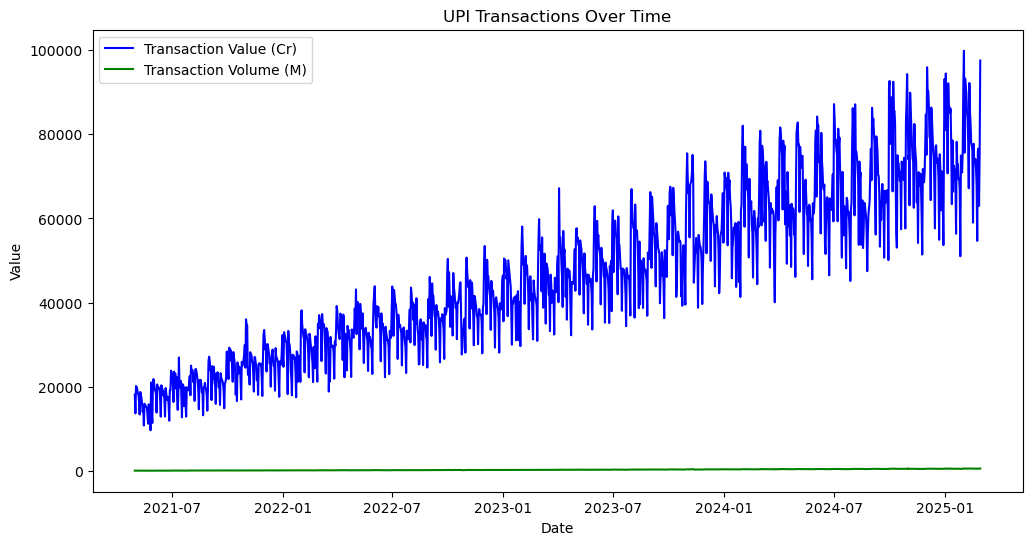

In [148]:
# Time Series Trend Analysis
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Transaction VALUE (IN CR.)'], label='Transaction Value (Cr)', color='b')
plt.plot(df.index, df['Transaction VOL (IN M.)'], label='Transaction Volume (M)', color='g')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('UPI Transactions Over Time')
plt.legend()
plt.show()

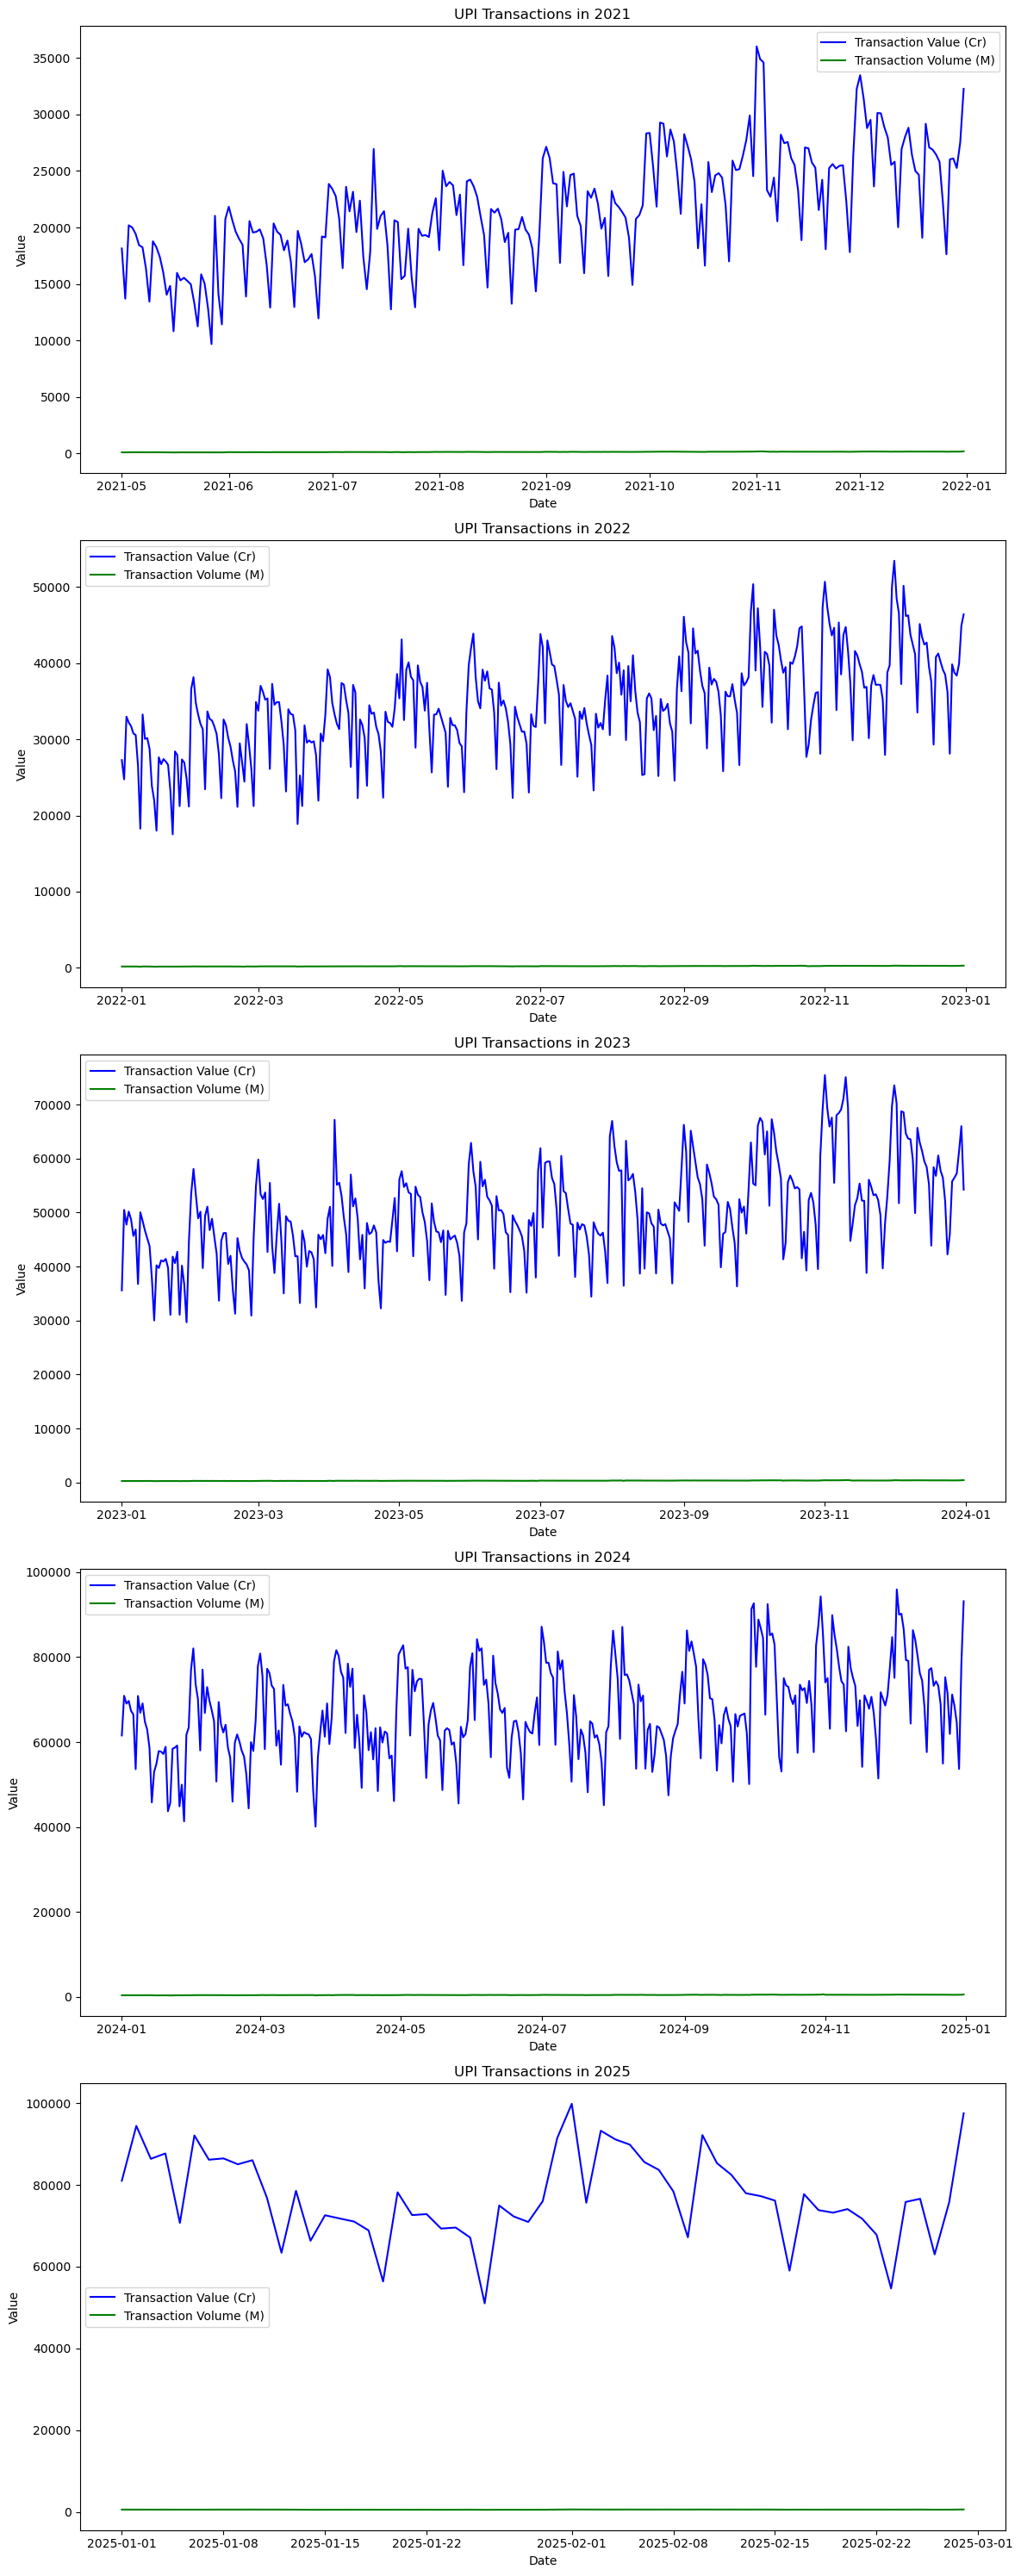

In [152]:
# Time Series Trend Analysis (Year-wise plots)
years = [2021, 2022, 2023, 2024, 2025]
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))
for i, year in enumerate(years):
    df_year = df[df.index.year == year]
    axes[i].plot(df_year.index, df_year['Transaction VALUE (IN CR.)'], label='Transaction Value (Cr)', color='b')
    axes[i].plot(df_year.index, df_year['Transaction VOL (IN M.)'], label='Transaction Volume (M)', color='g')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'UPI Transactions in {year}')
    axes[i].legend()
plt.tight_layout()
plt.show()

# MOVING AVERAGE ANALYSIS

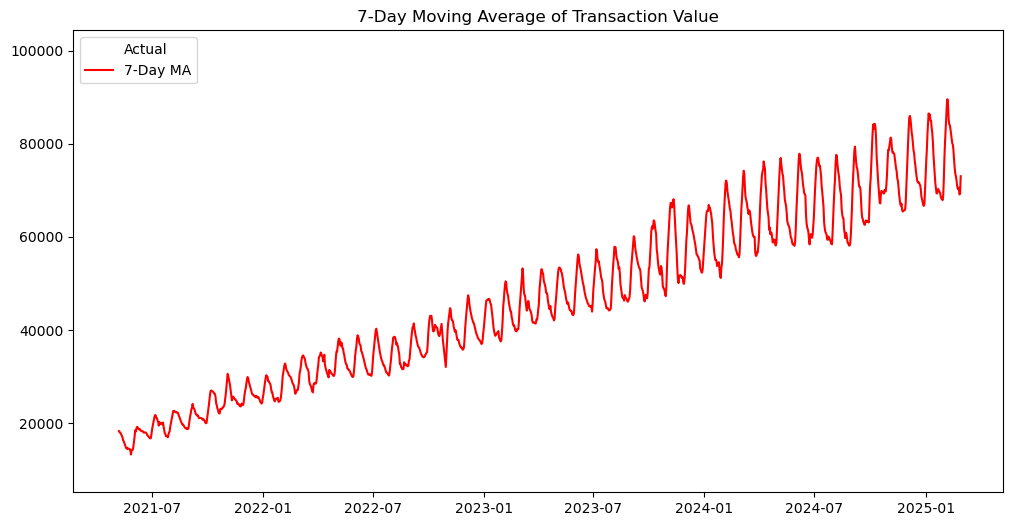

In [154]:
# Moving Average Analysis
df['Transaction_Value_MA'] = df['Transaction VALUE (IN CR.)'].rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Transaction VALUE (IN CR.)'], label='Actual', color='white')
plt.plot(df.index, df['Transaction_Value_MA'], label='7-Day MA', color='red')
plt.title('7-Day Moving Average of Transaction Value')
plt.legend()
plt.show()

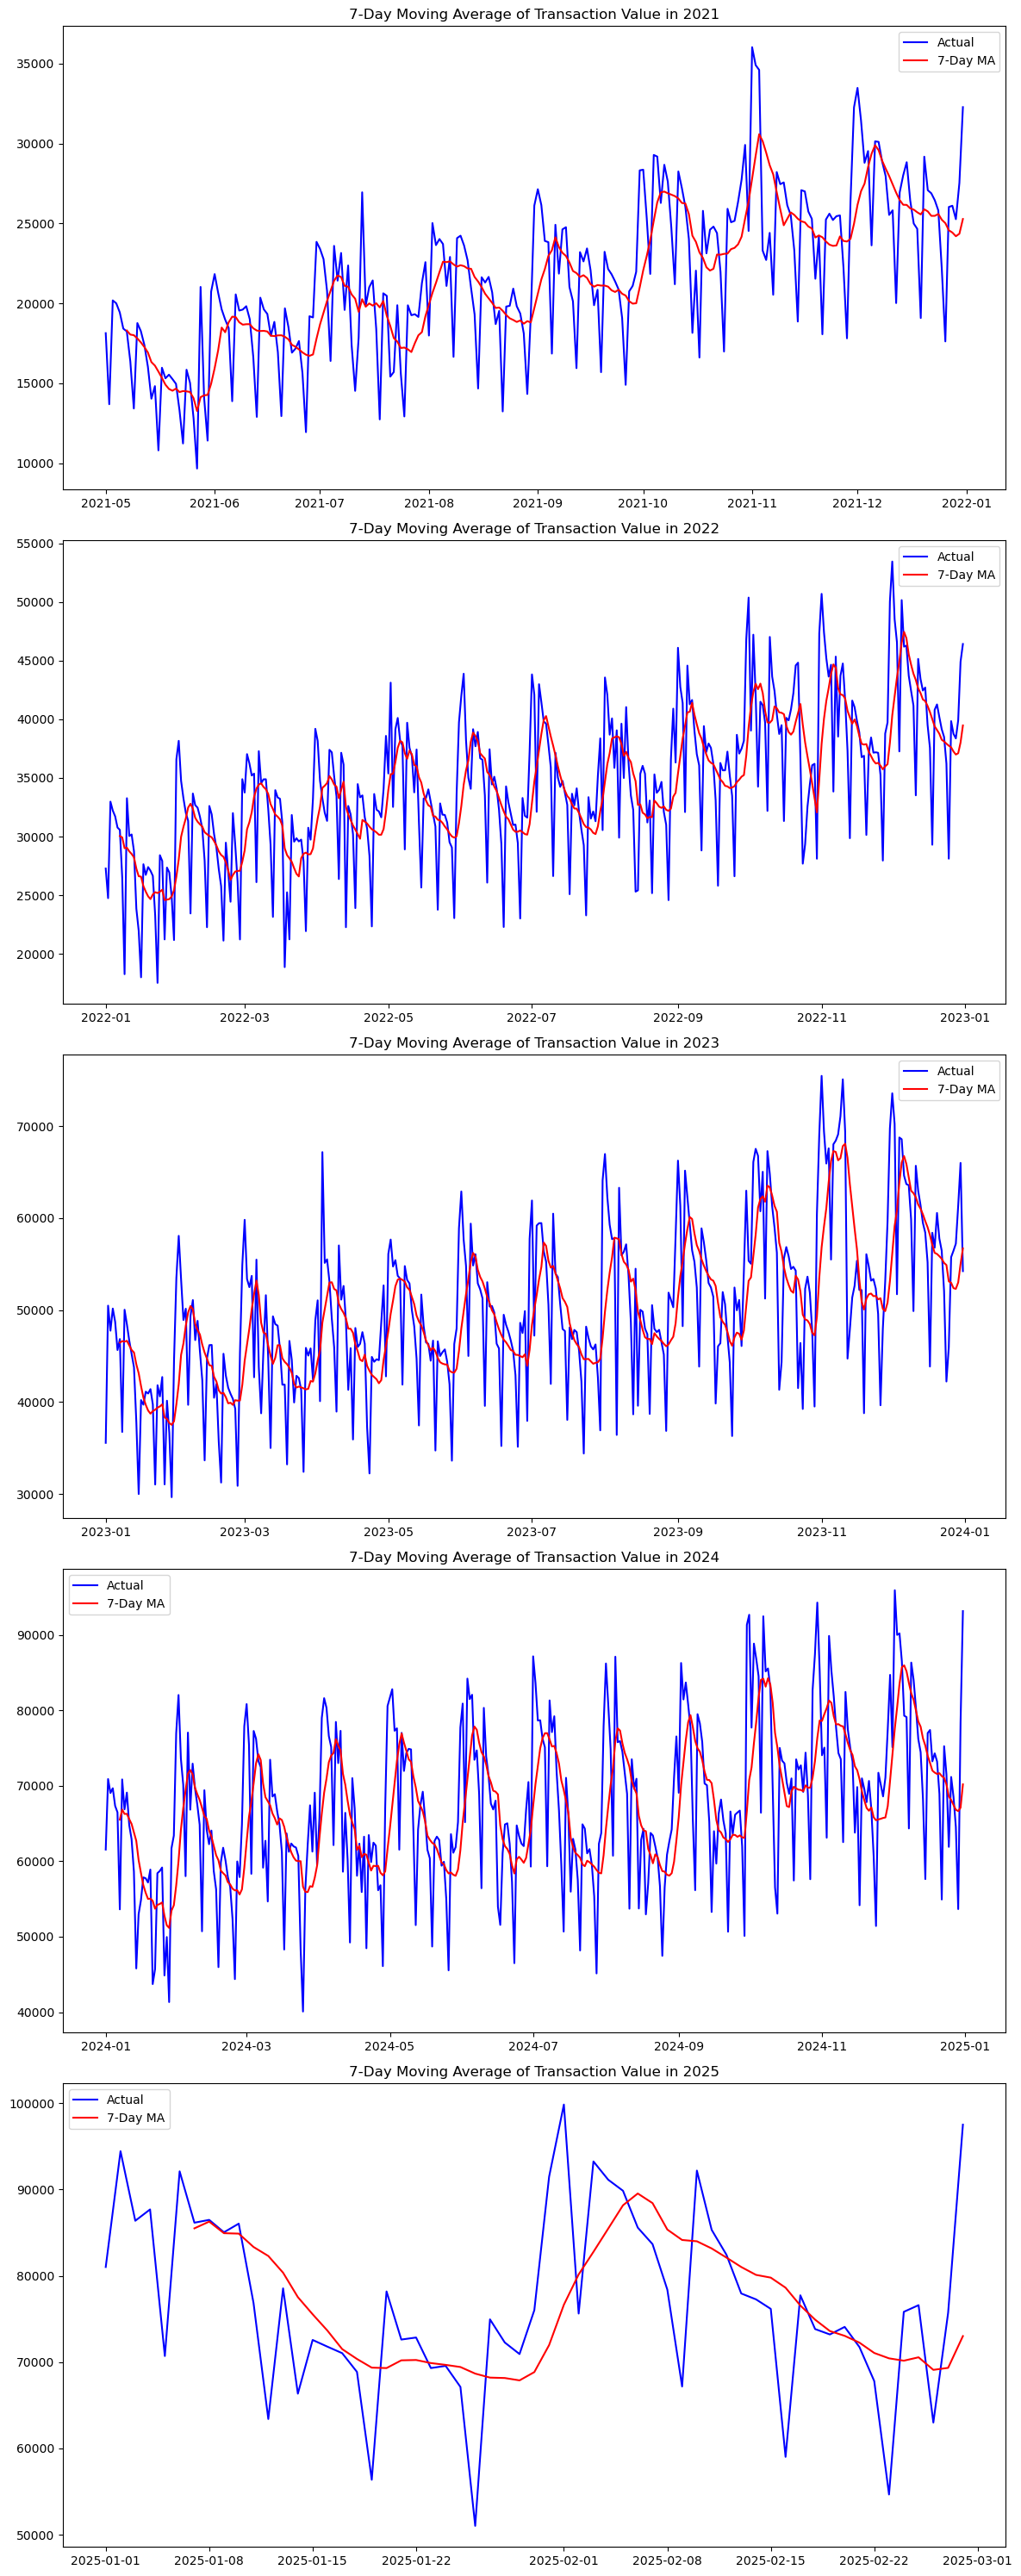

In [156]:
# Moving Average Analysis (7 day Year-wise plots)
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))
for i, year in enumerate(years):
    df_year = df[df.index.year == year].copy()
    df_year.loc[:, 'Transaction_Value_MA'] = df_year['Transaction VALUE (IN CR.)'].rolling(window=7).mean()
    axes[i].plot(df_year.index, df_year['Transaction VALUE (IN CR.)'], label='Actual', color='blue')
    axes[i].plot(df_year.index, df_year['Transaction_Value_MA'], label='7-Day MA', color='red')
    axes[i].set_title(f'7-Day Moving Average of Transaction Value in {year}')
    axes[i].legend()
plt.tight_layout()
plt.show()

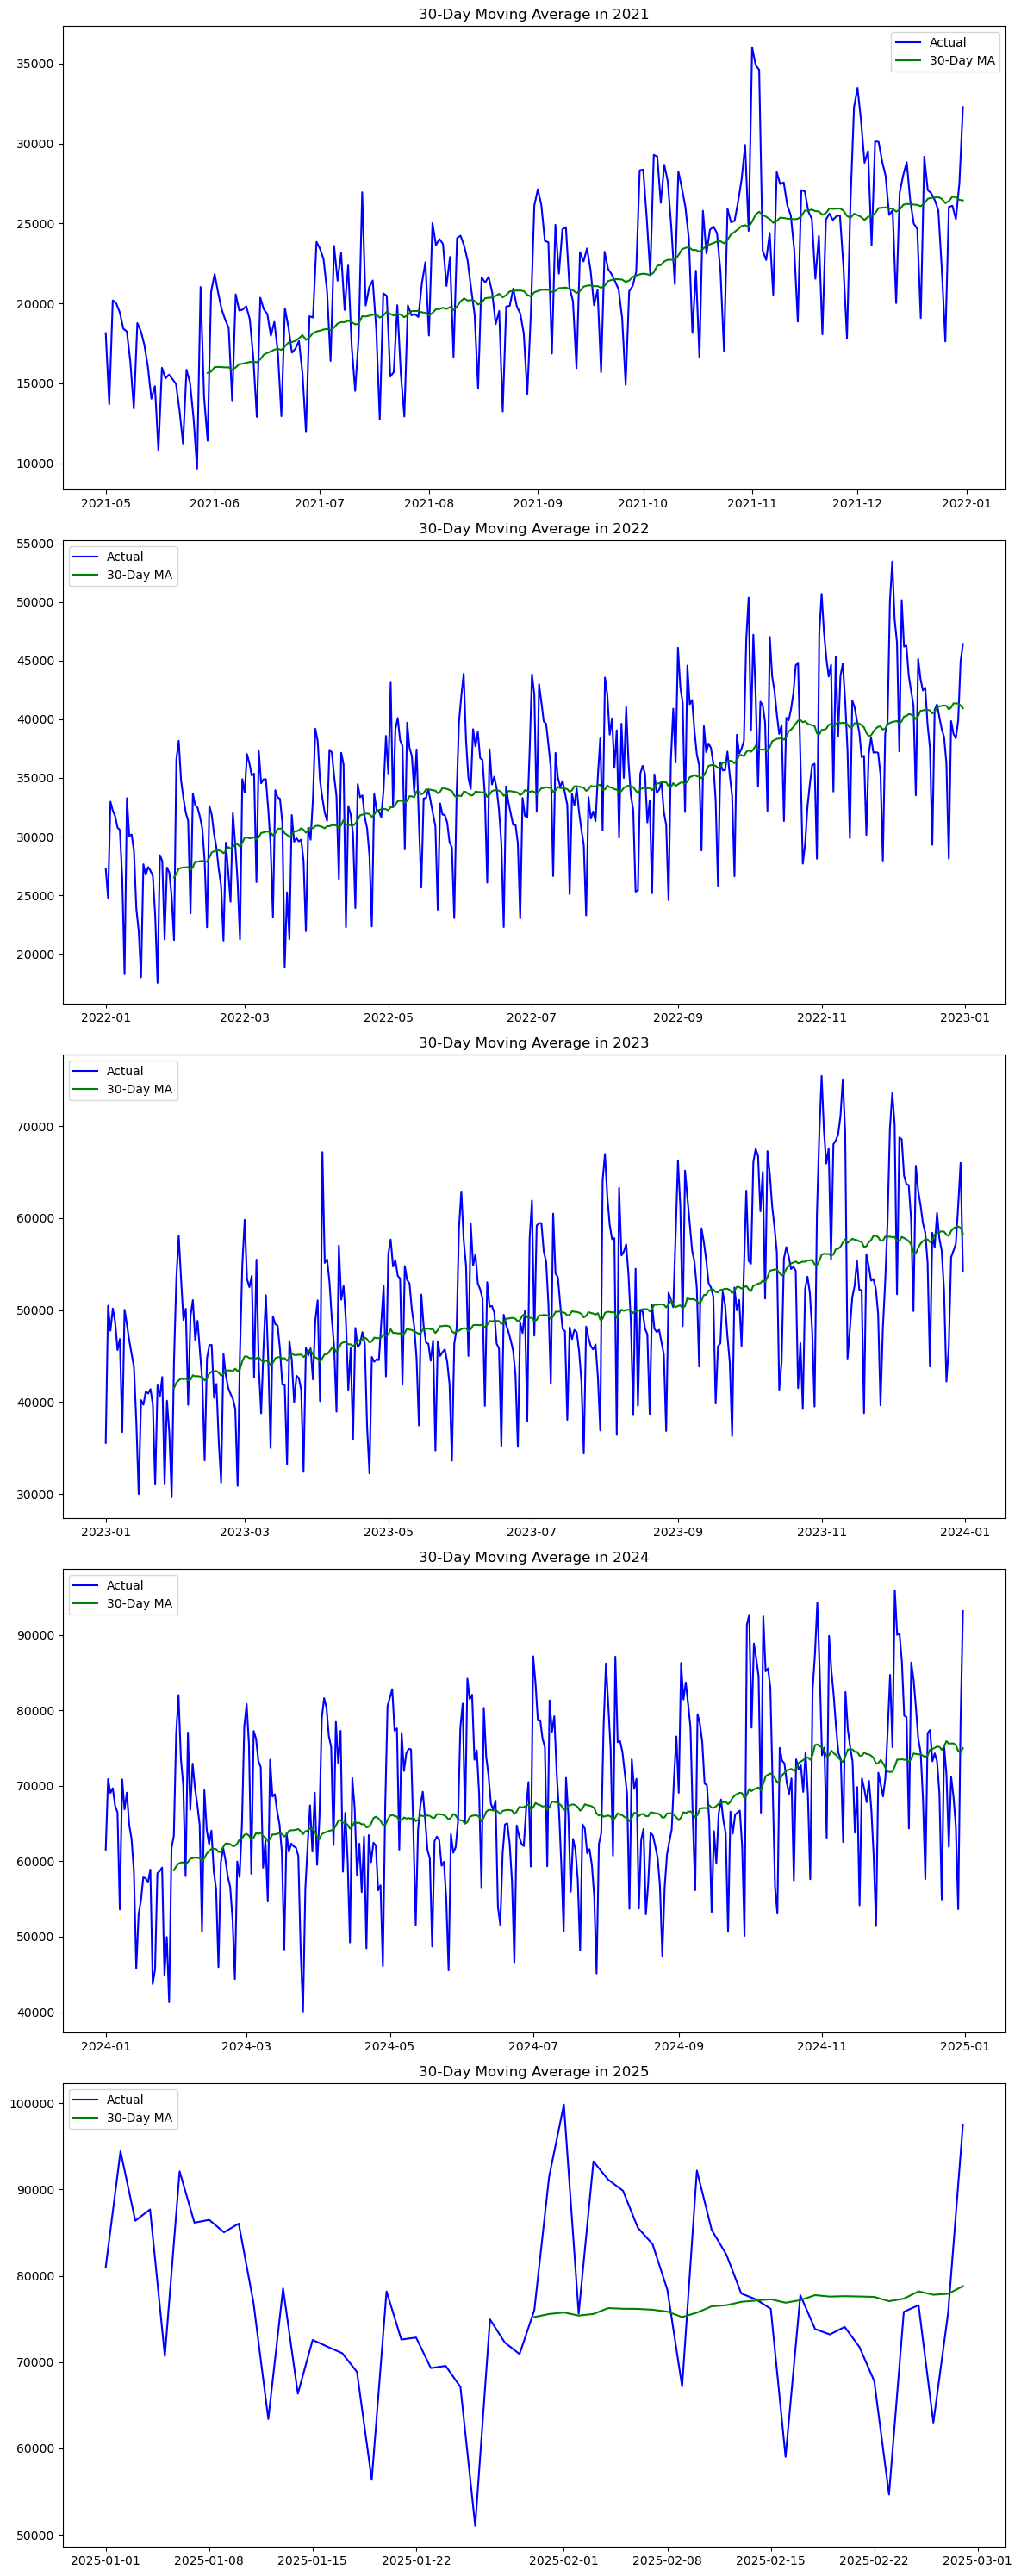

In [158]:
# Moving Average Analysis (30-Day, Year-wise plots)
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)))
for i, year in enumerate(years):
    df_year = df[df.index.year == year].copy()
    df_year.loc[:, 'Transaction_Value_MA_30'] = df_year['Transaction VALUE (IN CR.)'].rolling(window=30).mean()
    
    axes[i].plot(df_year.index, df_year['Transaction VALUE (IN CR.)'], label='Actual', color='blue')
    axes[i].plot(df_year.index, df_year['Transaction_Value_MA_30'], label='30-Day MA', color='green')
    axes[i].set_title(f'30-Day Moving Average in {year}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# CORRELATION HEAT MAP

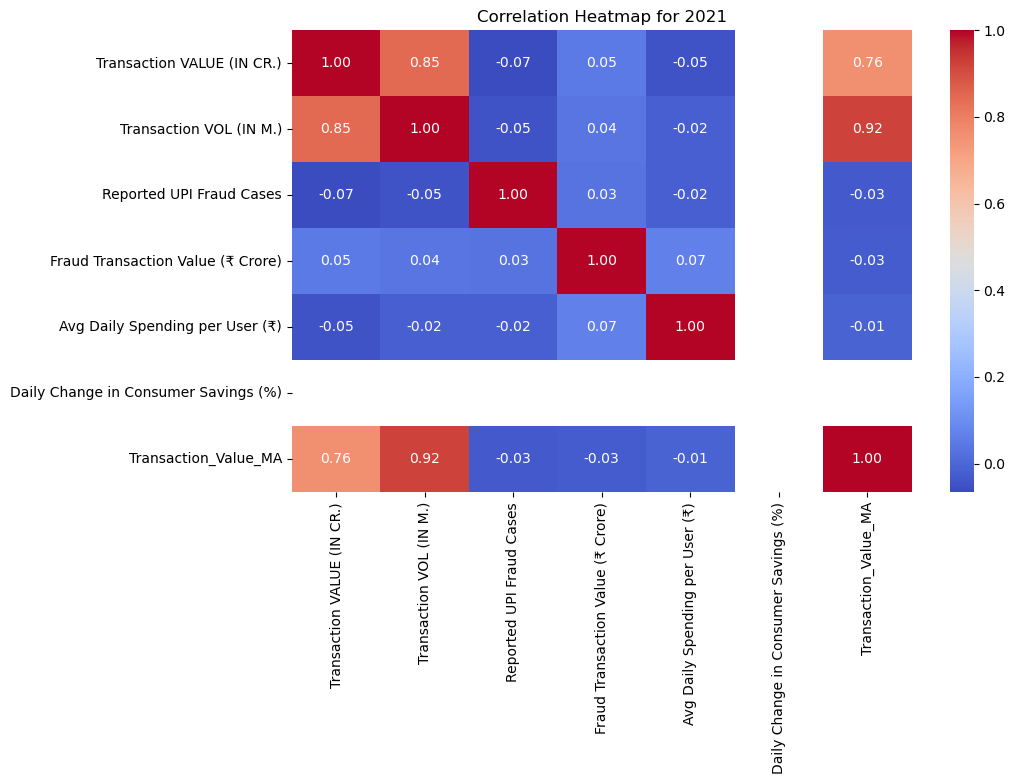

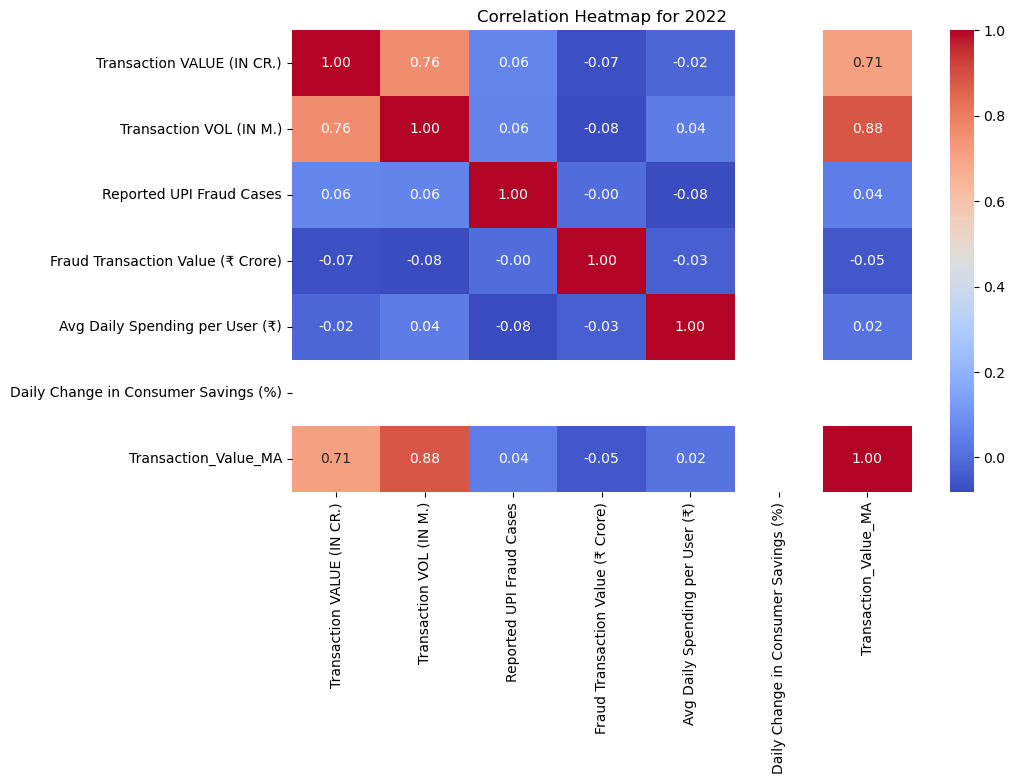

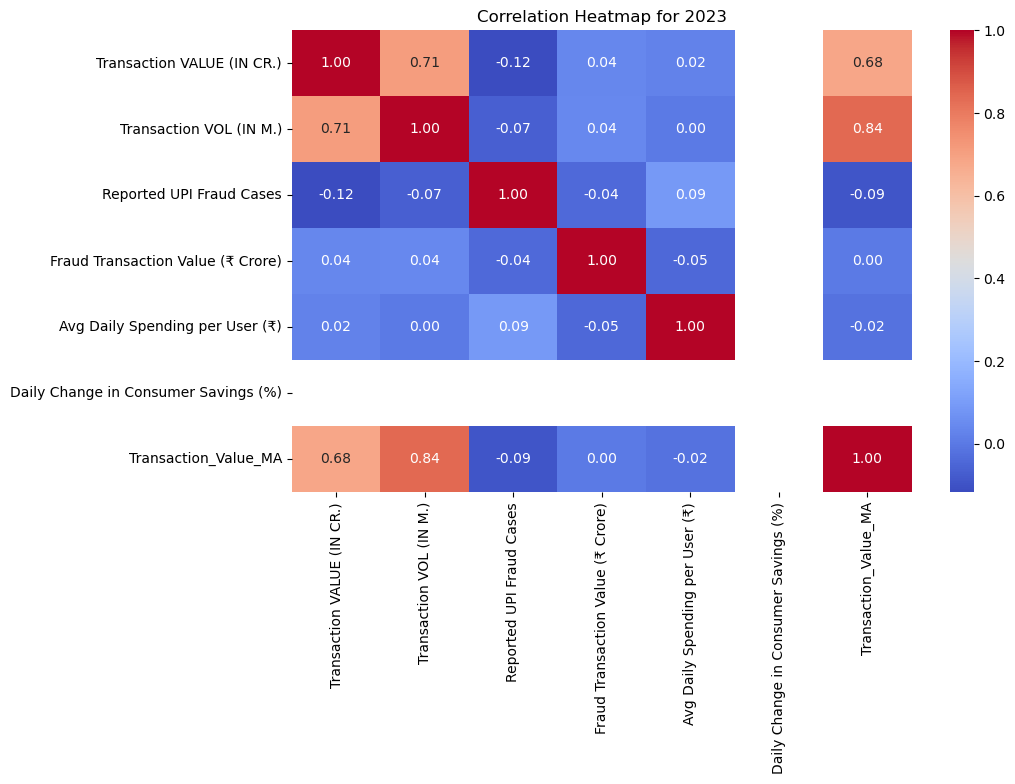

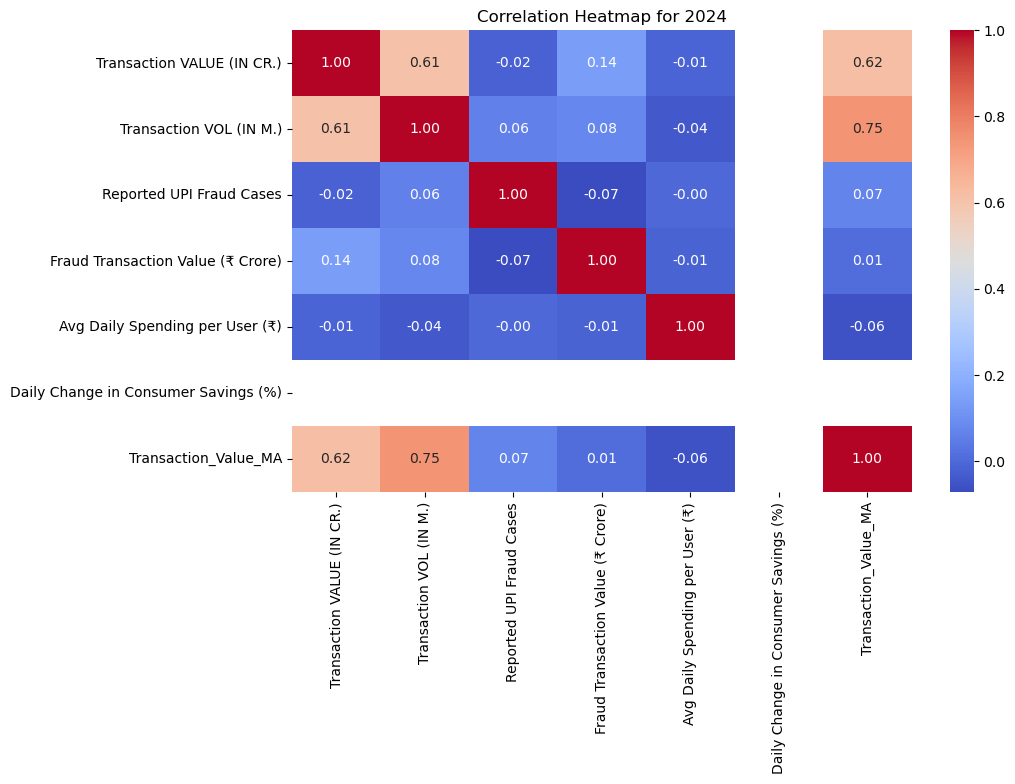

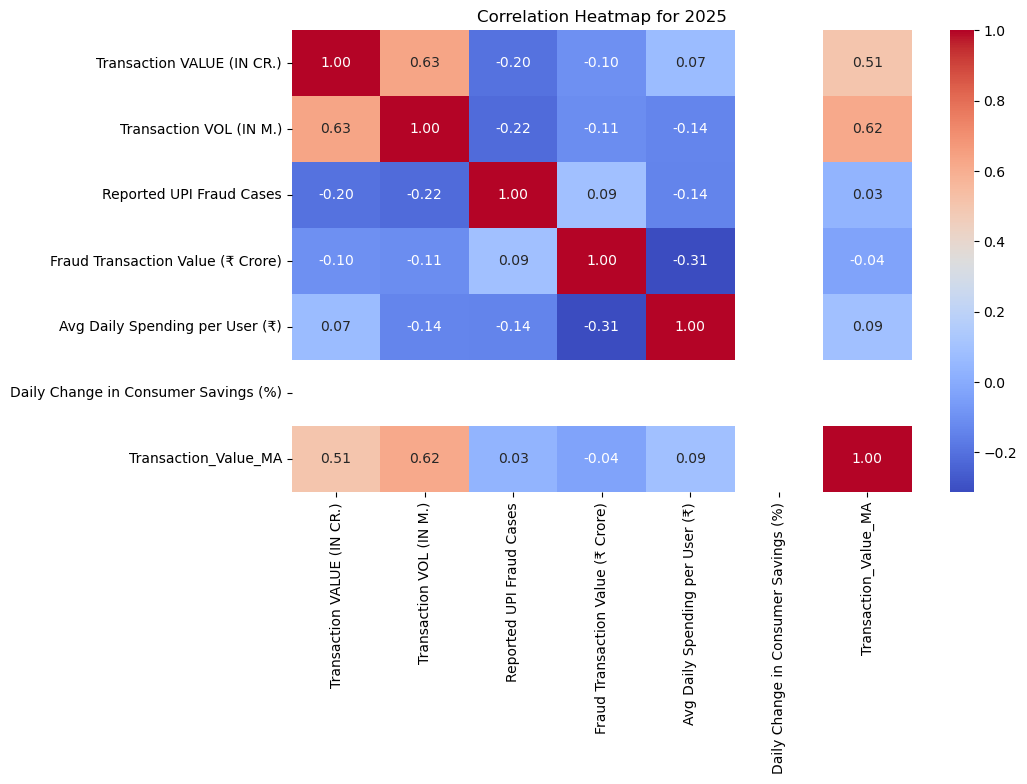

In [160]:
# Correlation Matrix & Heatmap (Year-wise)
for year in years:
    df_year = df[df.index.year == year].copy()
    plt.figure(figsize=(10,6))
    sns.heatmap(df_year.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {year}')
    plt.show()

# OUTLIER DETECTION OF FRAUDS

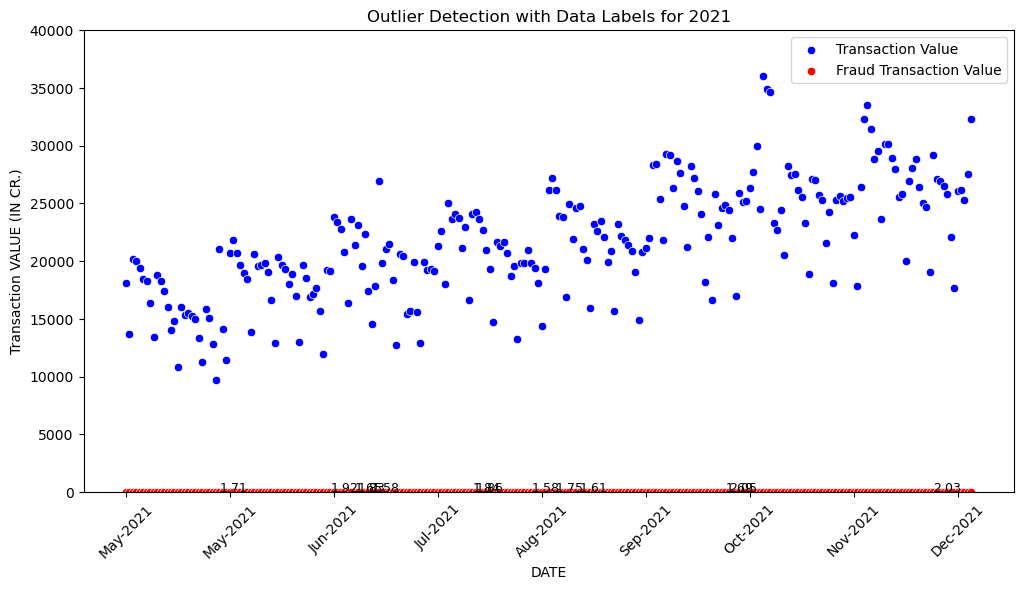

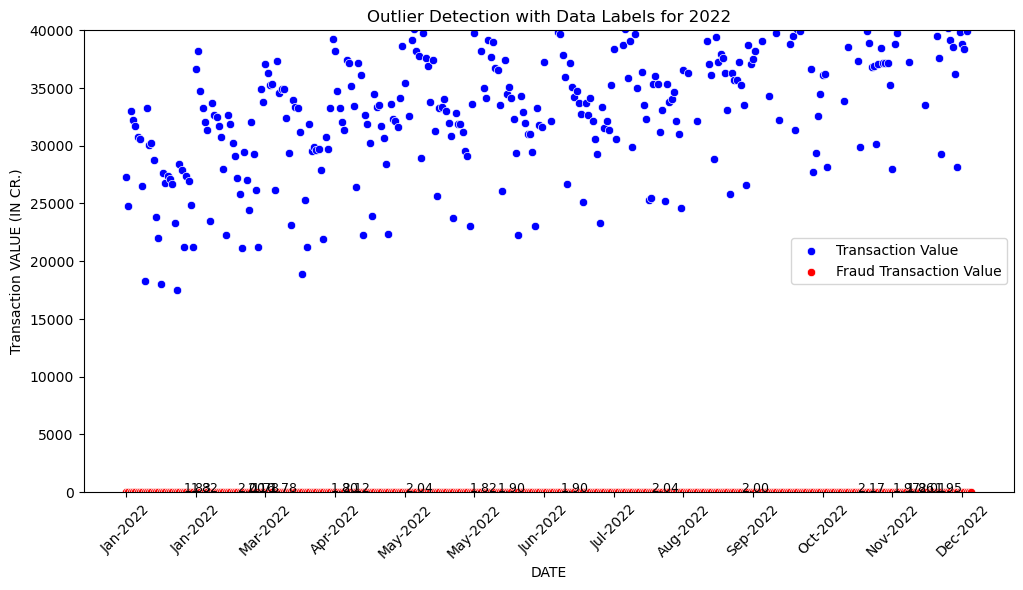

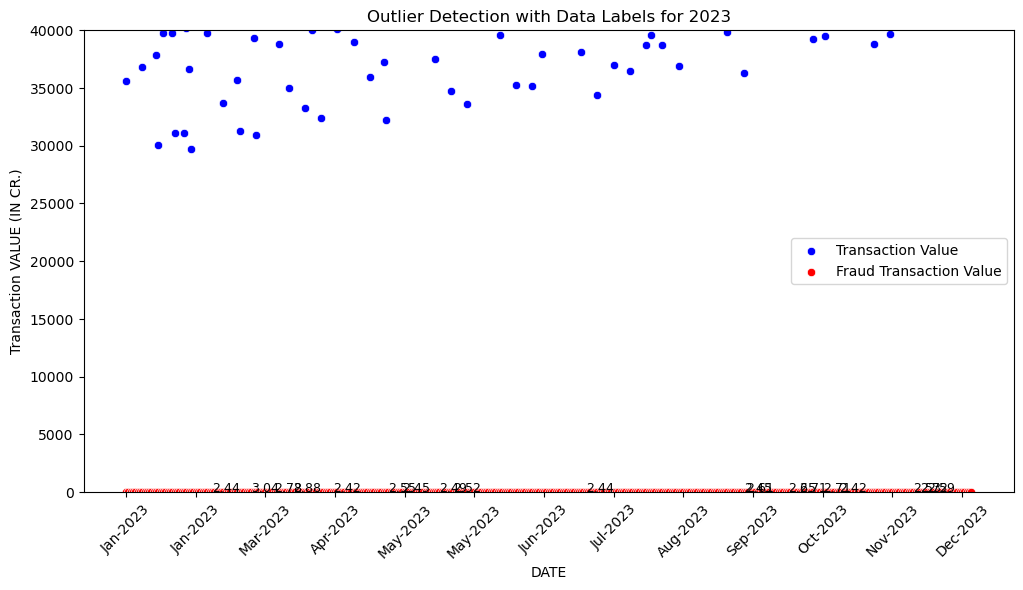

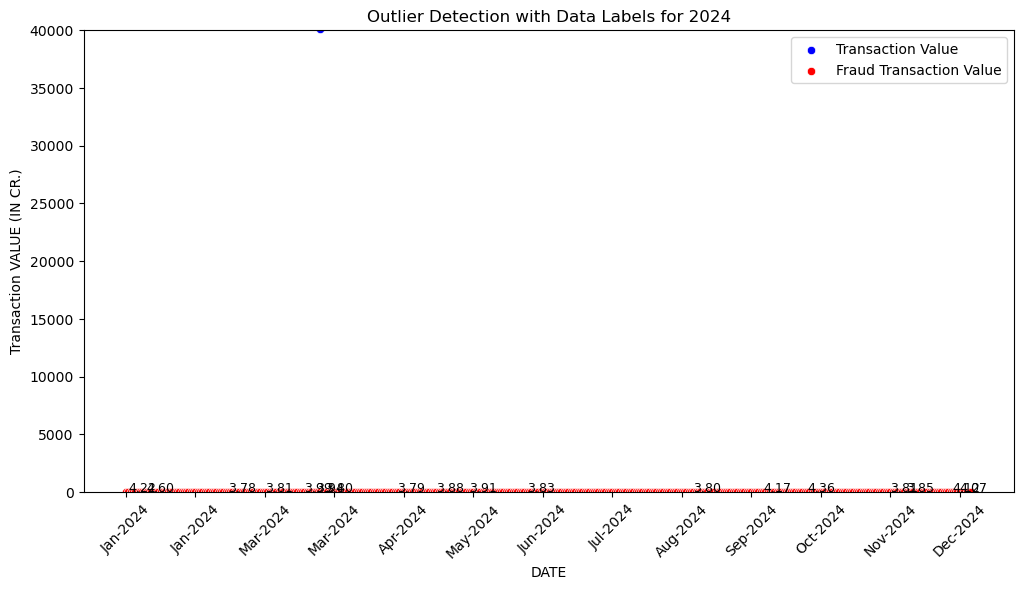

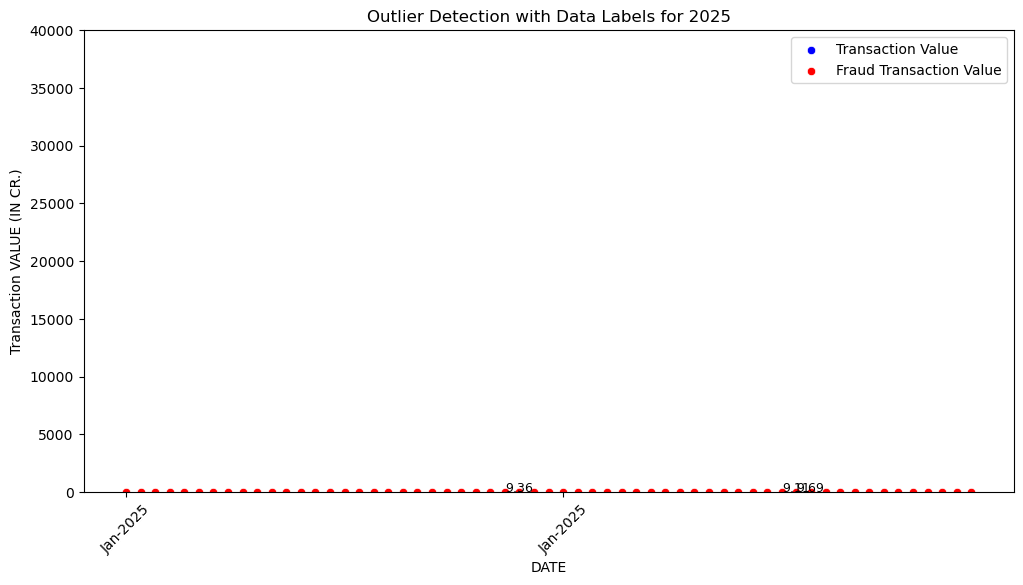

In [162]:
# Outlier Detection using Scatter Plots with Data Labels (Year-wise, segregated x-axis in months, adjusted y-scale)
for year in years:
    df_year = df[df.index.year == year].copy()
    fig, ax = plt.subplots(figsize=(12,6))
    sns.scatterplot(x=df_year.index, y=df_year['Transaction VALUE (IN CR.)'], color='blue', label='Transaction Value')
    sns.scatterplot(x=df_year.index, y=df_year['Fraud Transaction Value (₹ Crore)'], color='red', label='Fraud Transaction Value')
    ax.set_xticks(df_year.index[::30])  # Set x-axis labels to monthly intervals
    ax.set_xticklabels(df_year.index.strftime('%b-%Y')[::30], rotation=45)
    ax.set_ylim(0, 40000)
    for i, txt in enumerate(df_year['Fraud Transaction Value (₹ Crore)']):
        if txt > df_year['Fraud Transaction Value (₹ Crore)'].quantile(0.95):  # Labeling only extreme outliers
            ax.annotate(f'{txt:.2f}', (df_year.index[i], df_year['Fraud Transaction Value (₹ Crore)'].iloc[i]), fontsize=9, color='black')
    plt.title(f'Outlier Detection with Data Labels for {year}')
    plt.legend()
    plt.show()

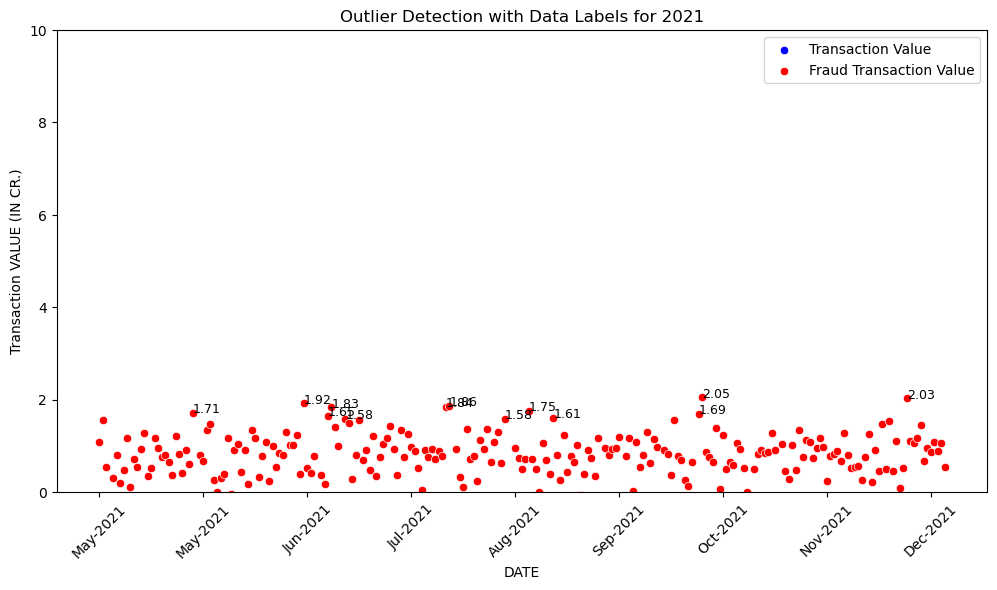

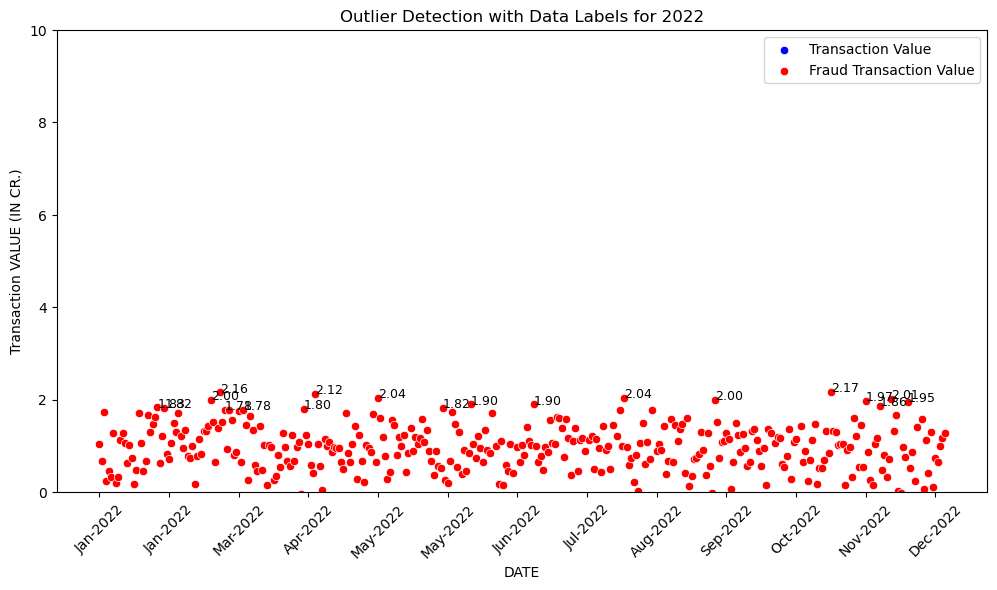

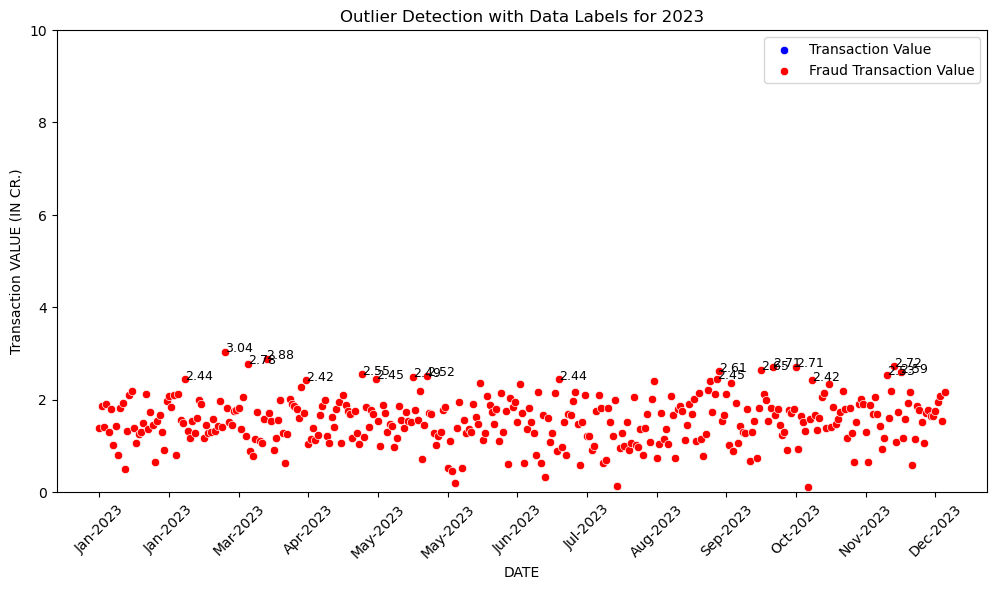

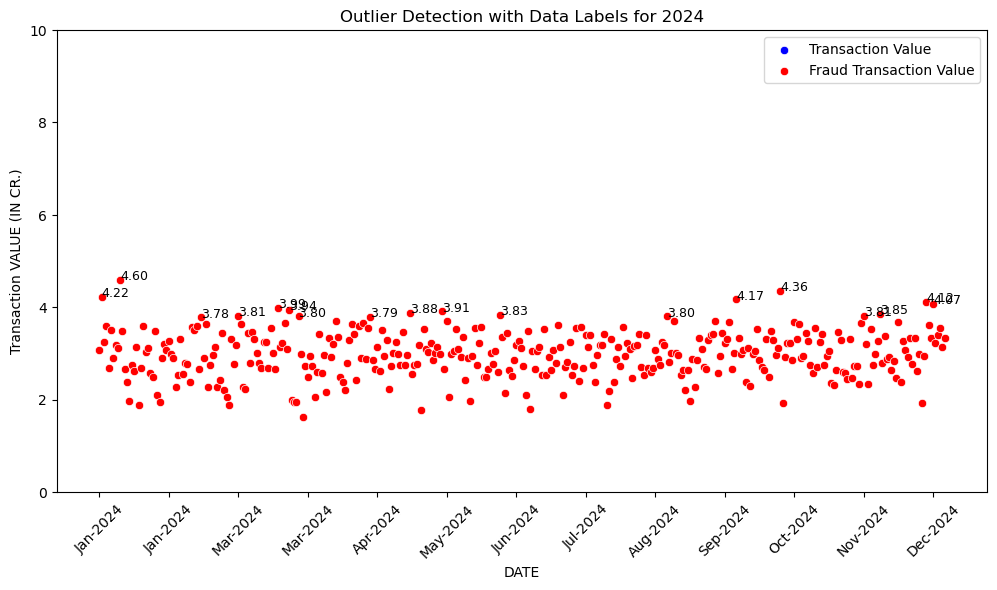

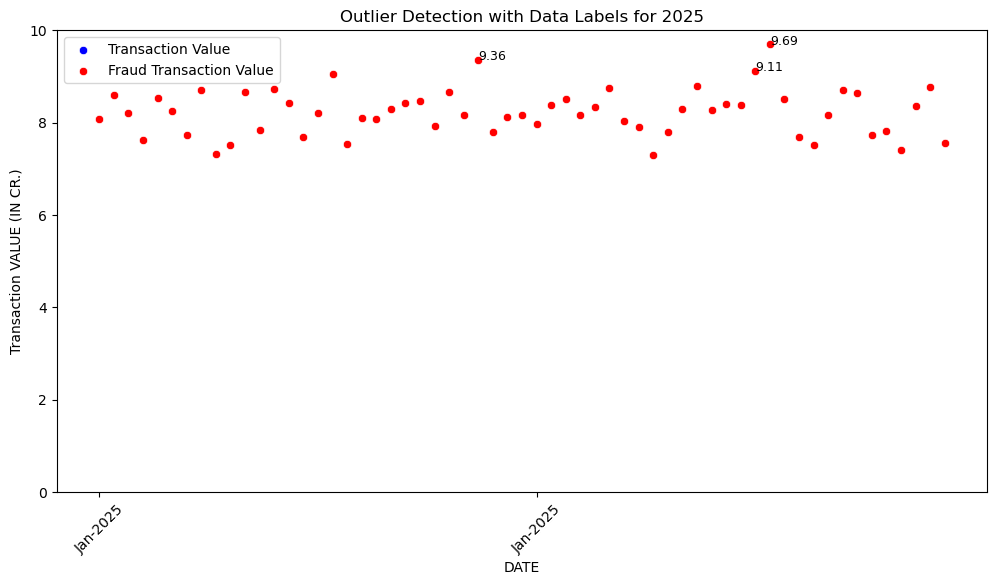

In [164]:
for year in years:
    df_year = df[df.index.year == year].copy()
    fig, ax = plt.subplots(figsize=(12,6))
    sns.scatterplot(x=df_year.index, y=df_year['Transaction VALUE (IN CR.)'], color='blue', label='Transaction Value')
    sns.scatterplot(x=df_year.index, y=df_year['Fraud Transaction Value (₹ Crore)'], color='red', label='Fraud Transaction Value')
    ax.set_xticks(df_year.index[::30])  # Set x-axis labels to monthly intervals
    ax.set_xticklabels(df_year.index.strftime('%b-%Y')[::30], rotation=45)
    ax.set_ylim(0, 10)
    for i, txt in enumerate(df_year['Fraud Transaction Value (₹ Crore)']):
        if txt > df_year['Fraud Transaction Value (₹ Crore)'].quantile(0.95):  # Labeling only extreme outliers
            ax.annotate(f'{txt:.2f}', (df_year.index[i], df_year['Fraud Transaction Value (₹ Crore)'].iloc[i]), fontsize=9, color='black')
    plt.title(f'Outlier Detection with Data Labels for {year}')
    plt.legend()
    plt.show()
### here we reduced sacle to 10 crore to see the outliers 

# REGRESSION MODEL

In [166]:
# Regression Model to Predict Fraud Transaction Value
# Ensure all predictor columns are numeric
df[['Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)', 'Avg Daily Spending per User (₹)', 'Fraud Transaction Value (₹ Crore)']] = df[['Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)', 'Avg Daily Spending per User (₹)', 'Fraud Transaction Value (₹ Crore)']].apply(pd.to_numeric, errors='coerce')
X = df[['Transaction VALUE (IN CR.)', 'Transaction VOL (IN M.)', 'Avg Daily Spending per User (₹)']]
y = df['Fraud Transaction Value (₹ Crore)']
X
y


DATE
2021-05-01    1.09
2021-05-02    1.56
2021-05-03    0.54
2021-05-04   -0.10
2021-05-05    0.31
              ... 
2025-02-24    7.81
2025-02-25    7.41
2025-02-26    8.36
2025-02-27    8.77
2025-02-28    7.55
Name: Fraud Transaction Value (₹ Crore), Length: 1400, dtype: float64

In [168]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

LinearRegression()

In [172]:
y_pred

array([1.72432645, 1.46459842, 0.31694734, 1.11112043, 0.58565793,
       1.72239507, 0.50196498, 2.25528007, 2.47237348, 1.10856511,
       2.8024404 , 2.43592959, 2.05381943, 2.01886707, 0.90015002,
       0.92038165, 1.21266821, 1.51314399, 0.55891541, 0.29860677,
       0.21931013, 0.54168143, 0.72467244, 1.87724418, 0.15204674,
       0.08775772, 0.20280013, 2.80883482, 3.23441983, 1.12862772,
       1.79084873, 1.36326909, 2.16409714, 1.93560377, 0.46096891,
       0.95624689, 0.73802146, 2.0363645 , 4.18430084, 2.88796665,
       0.3746449 , 3.03378706, 1.08970685, 2.61848879, 1.01641084,
       2.45835833, 2.82219168, 1.99469875, 0.25362666, 1.70950366,
       2.23467695, 0.42462665, 1.28340743, 3.29592553, 3.2262884 ,
       1.28174957, 1.01442109, 2.11672121, 0.58351916, 1.23944558,
       0.49226679, 0.56238338, 2.28827815, 2.47234944, 1.03841665,
       2.51707413, 3.399535  , 0.63639844, 0.93434923, 2.43867395,
       3.02188157, 1.09519855, 1.81884665, 2.17522599, 0.43820

In [174]:
# Regression Performance
print("Regression Model Performance:")
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.4f}')

Regression Model Performance:
MSE: 1.2077
RMSE: 1.0990
R^2 Score: 0.5668


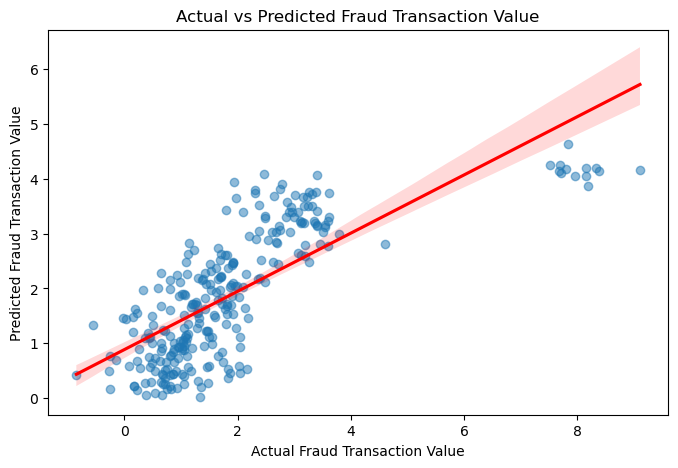

In [176]:
# Regression Scatter Plot with Trend Line
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Fraud Transaction Value')
plt.ylabel('Predicted Fraud Transaction Value')
plt.title('Actual vs Predicted Fraud Transaction Value')
plt.show()

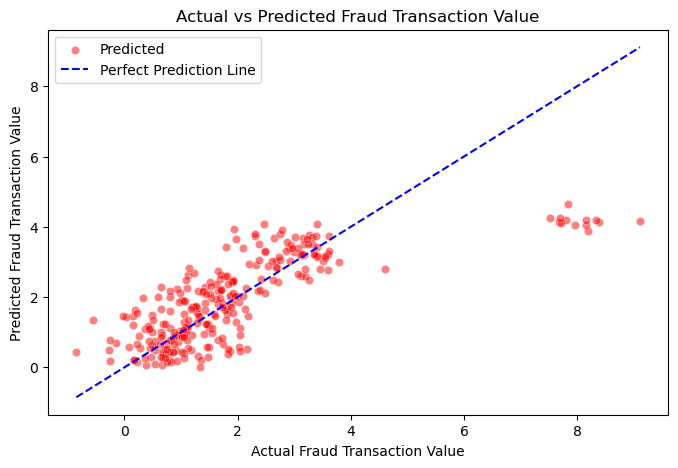

In [178]:
# Regression Scatter Plot with Trend Line (Enhanced)
plt.figure(figsize=(8,5))

# Scatter plot for actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='red', alpha=0.5, label='Predicted')

# 45-degree reference line (Perfect Predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='blue', label='Perfect Prediction Line')

plt.xlabel('Actual Fraud Transaction Value')
plt.ylabel('Predicted Fraud Transaction Value')
plt.title('Actual vs Predicted Fraud Transaction Value')
plt.legend()
plt.show()


# HOLT WINTERS EXPONENTIAL FORECASTING

In [186]:
ts_data = df['Transaction VALUE (IN CR.)']  # Your time series column
ts_data



DATE
2021-05-01    18140.21
2021-05-02    13692.47
2021-05-03    20191.07
2021-05-04    20005.02
2021-05-05    19438.15
                ...   
2025-02-24    75820.65
2025-02-25    76593.92
2025-02-26    62994.82
2025-02-27    75714.97
2025-02-28    97508.29
Name: Transaction VALUE (IN CR.), Length: 1400, dtype: float64

In [198]:
df.index = pd.to_datetime(df.index)  # Ensure DATE is in datetime format
df.index 



DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10',
               ...
               '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-22',
               '2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26',
               '2025-02-27', '2025-02-28'],
              dtype='datetime64[ns]', name='DATE', length=1400, freq='D')

In [202]:
df = df.asfreq('D')  # Set daily frequency
df

,Transaction VALUE (IN CR.),Transaction VOL (IN M.),Reported UPI Fraud Cases,Fraud Transaction Value (₹ Crore),Avg Daily Spending per User (₹),Daily Change in Consumer Savings (%),Transaction_Value_MA
DATE,,,,,,,
2021-05-01,18140.21,86.24,1084,1.09,76.42,-0.0068,NaN
2021-05-02,13692.47,79.37,1058,1.56,159.48,-0.0068,NaN
2021-05-03,20191.07,87.72,1132,0.54,71.63,-0.0068,NaN
2021-05-04,20005.02,89.31,1077,-0.10,121.71,-0.0068,NaN
2021-05-05,19438.15,87.70,1106,0.31,110.46,-0.0068,NaN
...,...,...,...,...,...,...,...
2025-02-24,75820.65,563.48,10629,7.81,222.13,-0.0233,70159.695714
2025-02-25,76593.92,576.50,10581,7.41,203.67,-0.0233,70555.282857
2025-02-26,62994.82,552.08,10666,8.36,207.58,-0.0233,69097.320000


In [226]:
# Ensure no missing values
df['Transaction VALUE (IN CR.)'] = df['Transaction VALUE (IN CR.)'].ffill()
df['Transaction VALUE (IN CR.)']

DATE
2021-05-01    18140.21
2021-05-02    13692.47
2021-05-03    20191.07
2021-05-04    20005.02
2021-05-05    19438.15
                ...   
2025-02-24    75820.65
2025-02-25    76593.92
2025-02-26    62994.82
2025-02-27    75714.97
2025-02-28    97508.29
Freq: D, Name: Transaction VALUE (IN CR.), Length: 1400, dtype: float64

In [224]:
# Select the time series column
ts_data = df['Transaction VALUE (IN CR.)']
ts_data

DATE
2021-05-01    18140.21
2021-05-02    13692.47
2021-05-03    20191.07
2021-05-04    20005.02
2021-05-05    19438.15
                ...   
2025-02-24    75820.65
2025-02-25    76593.92
2025-02-26    62994.82
2025-02-27    75714.97
2025-02-28    97508.29
Freq: D, Name: Transaction VALUE (IN CR.), Length: 1400, dtype: float64

In [247]:
forecast = hw_model.forecast(30)
forecast

2025-03-01    85720.973835
2025-03-02    89821.878660
2025-03-03    92316.061772
2025-03-04    87417.353146
2025-03-05    89303.459599
2025-03-06    85322.235049
2025-03-07    86545.574318
2025-03-08    83317.699431
2025-03-09    84442.705431
2025-03-10    80746.587297
2025-03-11    78217.227848
2025-03-12    81280.755278
2025-03-13    76830.987043
2025-03-14    76789.023747
2025-03-15    72378.668867
2025-03-16    75950.840110
2025-03-17    73832.979520
2025-03-18    71851.654419
2025-03-19    74437.181145
2025-03-20    71678.006256
2025-03-21    74434.623312
2025-03-22    72313.037859
2025-03-23    73570.072155
2025-03-24    71512.772628
2025-03-25    69707.261886
2025-03-26    75635.621812
2025-03-27    74199.240408
2025-03-28    76717.668860
2025-03-29    81795.295261
2025-03-30    87125.016451
Freq: D, dtype: float64

In [249]:
# Forecast next 30 days
forecast_steps = 30
forecast_index = pd.date_range(start=ts_data.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast = hw_model.forecast(steps=forecast_steps)
forecast_index
forecast

2025-03-01    85720.973835
2025-03-02    89821.878660
2025-03-03    92316.061772
2025-03-04    87417.353146
2025-03-05    89303.459599
2025-03-06    85322.235049
2025-03-07    86545.574318
2025-03-08    83317.699431
2025-03-09    84442.705431
2025-03-10    80746.587297
2025-03-11    78217.227848
2025-03-12    81280.755278
2025-03-13    76830.987043
2025-03-14    76789.023747
2025-03-15    72378.668867
2025-03-16    75950.840110
2025-03-17    73832.979520
2025-03-18    71851.654419
2025-03-19    74437.181145
2025-03-20    71678.006256
2025-03-21    74434.623312
2025-03-22    72313.037859
2025-03-23    73570.072155
2025-03-24    71512.772628
2025-03-25    69707.261886
2025-03-26    75635.621812
2025-03-27    74199.240408
2025-03-28    76717.668860
2025-03-29    81795.295261
2025-03-30    87125.016451
Freq: D, dtype: float64

In [251]:
forecast

2025-03-01    85720.973835
2025-03-02    89821.878660
2025-03-03    92316.061772
2025-03-04    87417.353146
2025-03-05    89303.459599
2025-03-06    85322.235049
2025-03-07    86545.574318
2025-03-08    83317.699431
2025-03-09    84442.705431
2025-03-10    80746.587297
2025-03-11    78217.227848
2025-03-12    81280.755278
2025-03-13    76830.987043
2025-03-14    76789.023747
2025-03-15    72378.668867
2025-03-16    75950.840110
2025-03-17    73832.979520
2025-03-18    71851.654419
2025-03-19    74437.181145
2025-03-20    71678.006256
2025-03-21    74434.623312
2025-03-22    72313.037859
2025-03-23    73570.072155
2025-03-24    71512.772628
2025-03-25    69707.261886
2025-03-26    75635.621812
2025-03-27    74199.240408
2025-03-28    76717.668860
2025-03-29    81795.295261
2025-03-30    87125.016451
Freq: D, dtype: float64

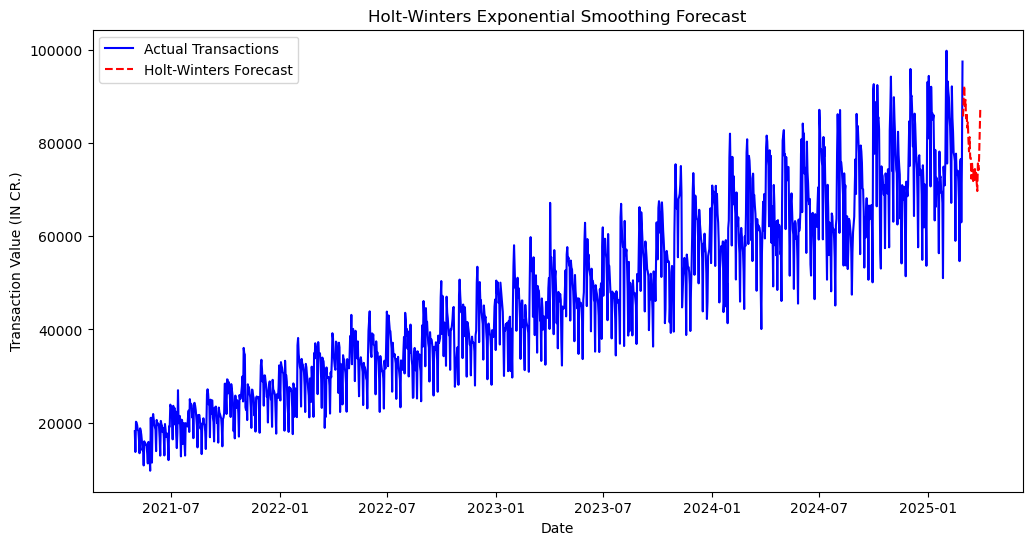

In [240]:
# Plot Actual vs Forecasted Values
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label="Actual Transactions", color='blue')
plt.plot(forecast_index, forecast, label="Holt-Winters Forecast", color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Transaction Value (IN CR.)")
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.legend()
plt.show()
### holt winter exponential smoothening forecast noraml

In [256]:
ts_data_2025 = ts_data[ts_data.index.year == 2025]
ts_data_2025

DATE
2025-01-01    81015.79
2025-01-02    94429.32
2025-01-03    86371.90
2025-01-04    87686.56
2025-01-05    70700.73
2025-01-06    92101.54
2025-01-07    86148.85
2025-01-08    86474.61
2025-01-09    85038.14
2025-01-10    86039.63
2025-01-11    76848.16
2025-01-12    63403.00
2025-01-13    78541.07
2025-01-14    66339.87
2025-01-15    72564.96
2025-01-16    71787.04
2025-01-17    71032.39
2025-01-18    68860.95
2025-01-19    56364.25
2025-01-20    78187.93
2025-01-21    72609.39
2025-01-22    72846.10
2025-01-23    69306.15
2025-01-24    69561.04
2025-01-25    67121.44
2025-01-26    51023.09
2025-01-27    74950.26
2025-01-28    72270.63
2025-01-29    70929.65
2025-01-30    76012.84
2025-01-31    91469.83
2025-02-01    99835.69
2025-02-02    75620.60
2025-02-03    93245.74
2025-02-04    91126.60
2025-02-05    89847.56
2025-02-06    85577.46
2025-02-07    83661.64
2025-02-08    78394.48
2025-02-09    67170.58
2025-02-10    92183.30
2025-02-11    85320.26
2025-02-12    82436.06
2025-0

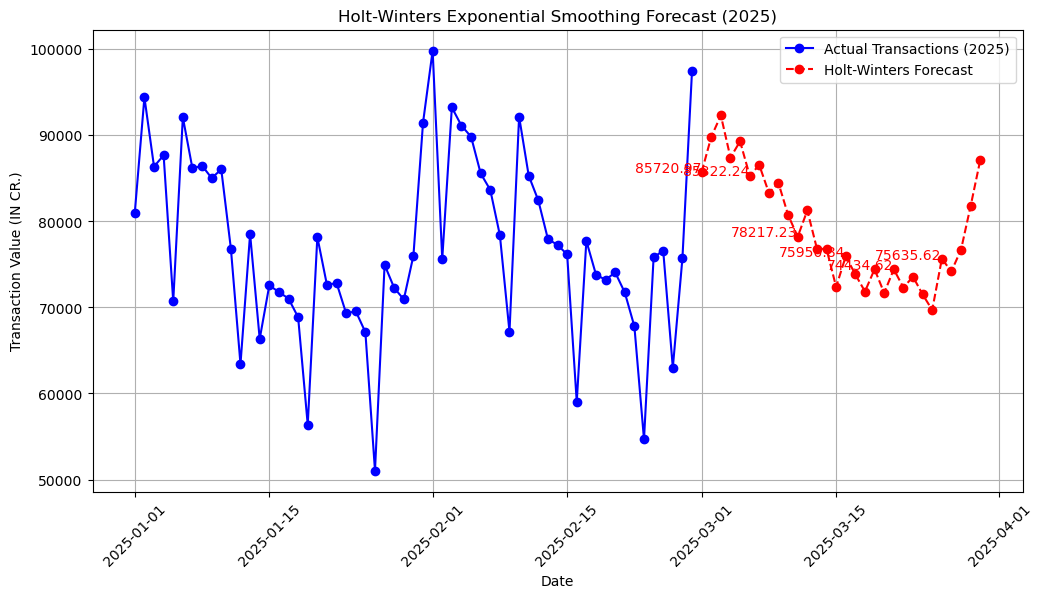

In [258]:
# Plot Actual vs Forecasted Values (Only 2025)
plt.figure(figsize=(12, 6))
plt.plot(ts_data_2025, label="Actual Transactions (2025)", color='blue', marker='o')
plt.plot(forecast_index, forecast, label="Holt-Winters Forecast", color='red', linestyle='dashed', marker='o')

# Add data labels to the forecasted values
for i, (date, value) in enumerate(zip(forecast_index, forecast)):
    if i % 5 == 0:  # Show label every 5th point for clarity
        plt.text(date, value, f"{value:.2f}", fontsize=10, color='red', ha='right')

plt.xlabel("Date")
plt.ylabel("Transaction Value (IN CR.)")
plt.title("Holt-Winters Exponential Smoothing Forecast (2025)")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
### shows forecast of 2025

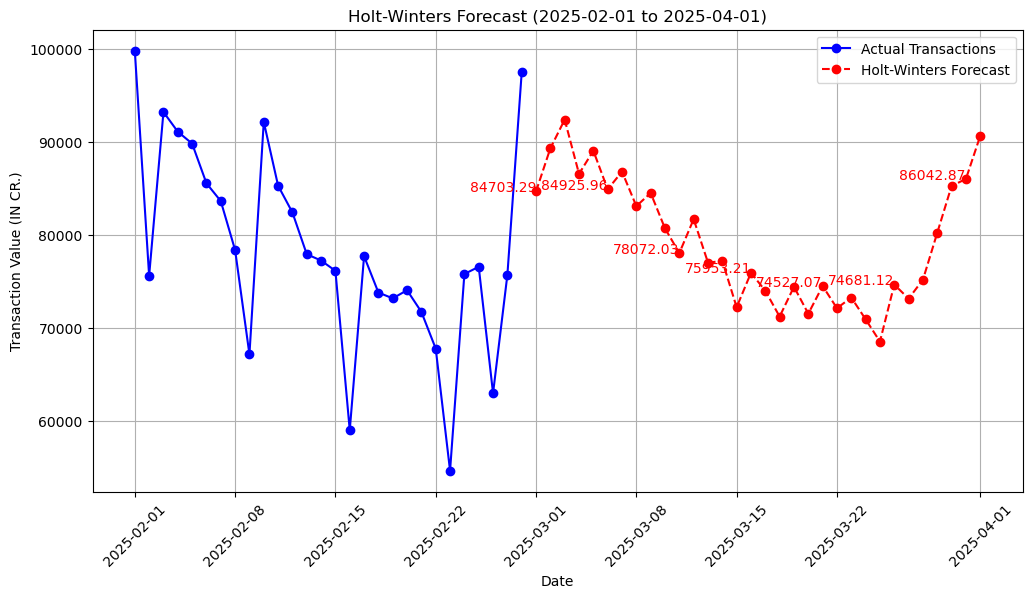

In [266]:
# Select the time series column (Transaction Value)
ts_data = df['Transaction VALUE (IN CR.)'].dropna()
ts_data


# Forecast next 60 days (Ensuring we have data up to 2025-04-01)
forecast_steps = 60
forecast_index = pd.date_range(start=ts_data.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast = hw_model.forecast(steps=forecast_steps)

# Define the desired date range for visualization
start_date = "2025-02-01"
end_date = "2025-04-01"

# Filter actual data and forecast data within the specified range
actual_2025 = ts_data[(ts_data.index >= start_date) & (ts_data.index <= end_date)]
forecast_filtered = forecast[(forecast_index >= start_date) & (forecast_index <= end_date)]
forecast_index_filtered = forecast_index[(forecast_index >= start_date) & (forecast_index <= end_date)]

# Plot Actual vs Forecasted Values for selected range
plt.figure(figsize=(12, 6))
plt.plot(actual_2025, label="Actual Transactions", color='blue', marker='o')
plt.plot(forecast_index_filtered, forecast_filtered, label="Holt-Winters Forecast", color='red', linestyle='dashed', marker='o')

# Add data labels to the forecasted values
for i, (date, value) in enumerate(zip(forecast_index_filtered, forecast_filtered)):
    if i % 5 == 0:  # Show label every 5th point for clarity
        plt.text(date, value, f"{value:.2f}", fontsize=10, color='red', ha='right')

plt.xlabel("Date")
plt.ylabel("Transaction Value (IN CR.)")
plt.title("Holt-Winters Forecast (2025-02-01 to 2025-04-01)")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
### this graphs exytensively focuses on yera 2025 forecast with data labels

# LSTM FORECAST

In [ ]:
# 📌 Focus on 2025 Data
df_2025 = df.loc['2025']
df_2025

In [ ]:
# 📌 Select Transaction Value Column
rs_data = df_2025['Transaction VALUE (IN CR.)'].dropna()
rs_data

In [ ]:
# 📌 Normalize Data (LSTM needs scaled values)
scaler = MinMaxScaler(feature_range=(0,1))
ts_scaled = scaler.fit_transform(ts_data.values.reshape(-1,1))

In [ ]:
# 📌 Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30  # 30 days window
X, y = create_sequences(ts_scaled, SEQ_LENGTH)

In [ ]:

# 📌 Split into Train-Test (80-20)
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [ ]:

# 📌 Split into Train-Test (80-20)
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [ ]:
# 📌 Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

In [ ]:
# 📌 Compile Model
model.compile(optimizer='adam', loss='mse')

# 📌 Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
history

In [ ]:
# 📌 Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale

In [ ]:
# 📌 Visualize Predictions vs Actual
plt.figure(figsize=(12,6))
plt.plot(df_2025.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual", color='blue')
plt.plot(df_2025.index[-len(y_test):], predictions, label="LSTM Prediction", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Transaction Value (IN CR.)")
plt.title("LSTM Forecast for UPI Transactions in 2025")
plt.legend()
plt.show()

In [293]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1096, 30, 1)
Shape of y_train: (1096, 1)


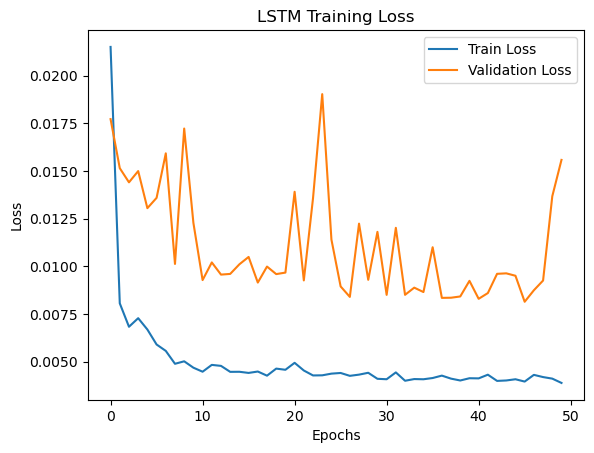

In [295]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training Loss')
plt.legend()
plt.show()

            Transaction VALUE (IN CR.)  Transaction VOL (IN M.)  \
DATE                                                              
2025-01-01                    81015.79                   568.43   
2025-01-02                    94429.32                   565.22   
2025-01-03                    86371.90                   559.45   
2025-01-04                    87686.56                   562.35   
2025-01-05                    70700.73                   557.00   

            Reported UPI Fraud Cases  Fraud Transaction Value (₹ Crore)  \
DATE                                                                      
2025-01-01                     10471                               8.07   
2025-01-02                     10613                               8.59   
2025-01-03                     10795                               8.21   
2025-01-04                     10498                               7.63   
2025-01-05                     10940                               8.53   

    

ValueError: x and y must have same first dimension, but have shapes (59,) and (277,)

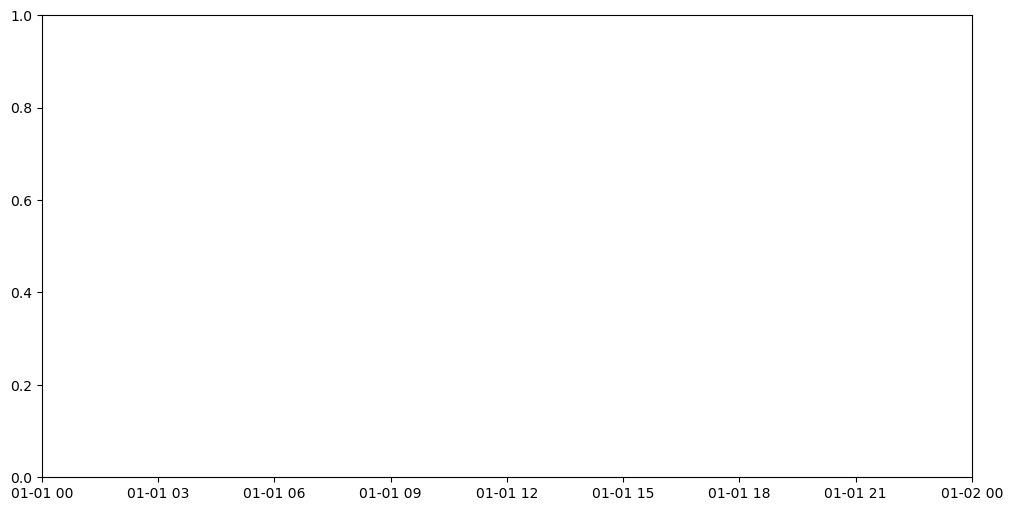

In [311]:
# Focus on 2025 Data
df_2025 = df.loc['2025']
print(df_2025.head())  # Check data availability

# Select Transaction Value Column
rs_data = df_2025['Transaction VALUE (IN CR.)'].dropna()

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_scaled = scaler.fit_transform(ts_data.values.reshape(-1, 1))

# Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 15
X, y = create_sequences(ts_scaled, SEQ_LENGTH)

# Train-Test Split
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Debugging prints
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Ensure correct alignment of indices
test_dates = df_2025.index[-len(actual_values):]  # Match number of test samples

# Debugging print statements
print(f"Test dates length: {len(test_dates)}")
print(f"Actual values length: {len(actual_values)}")
print(f"Predictions length: {len(predictions)}")

# Check for NaN values
print("NaN in test_dates:", test_dates.isna().sum())
print("NaN in actual_values:", np.isnan(actual_values).sum())
print("NaN in predictions:", np.isnan(predictions).sum())

# Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_values.flatten(), label="Actual", color='blue', marker='o')
plt.plot(test_dates, predictions.flatten(), label="LSTM Prediction", color='red', linestyle='dashed', marker='x')
plt.xlabel("Date")
plt.ylabel("Transaction Value (IN CR.)")
plt.title("LSTM Forecast for UPI Transactions in 2025")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

